In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

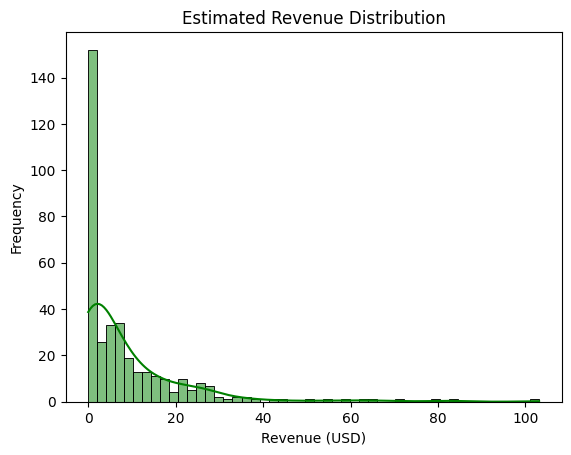

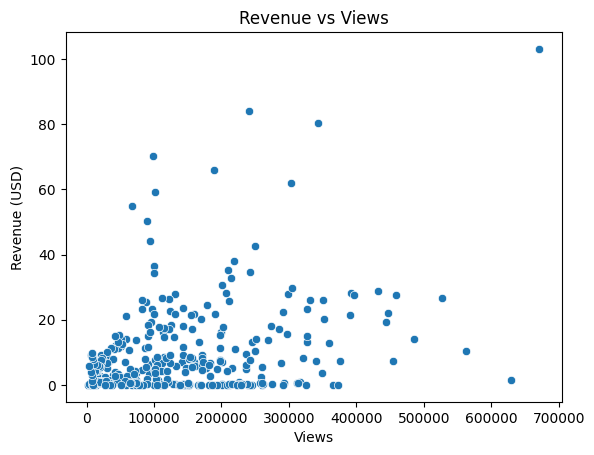

In [ ]:
data = pd.read_csv("youtube_channel_real_performance_analytics.csv")

# ✅ 3. Data Preprocessing
# Drop rows with missing values
data.dropna(inplace=True)

# ✅ 4. Exploratory Data Analysis
sns.histplot(data['Estimated Revenue (USD)'], bins=50, kde=True, color='green')
plt.title("Estimated Revenue Distribution")
plt.xlabel("Revenue (USD)")
plt.ylabel("Frequency")
plt.show()

sns.scatterplot(x=data['Views'], y=data['Estimated Revenue (USD)'])
plt.title("Revenue vs Views")
plt.xlabel("Views")
plt.ylabel("Revenue (USD)")
plt.show()


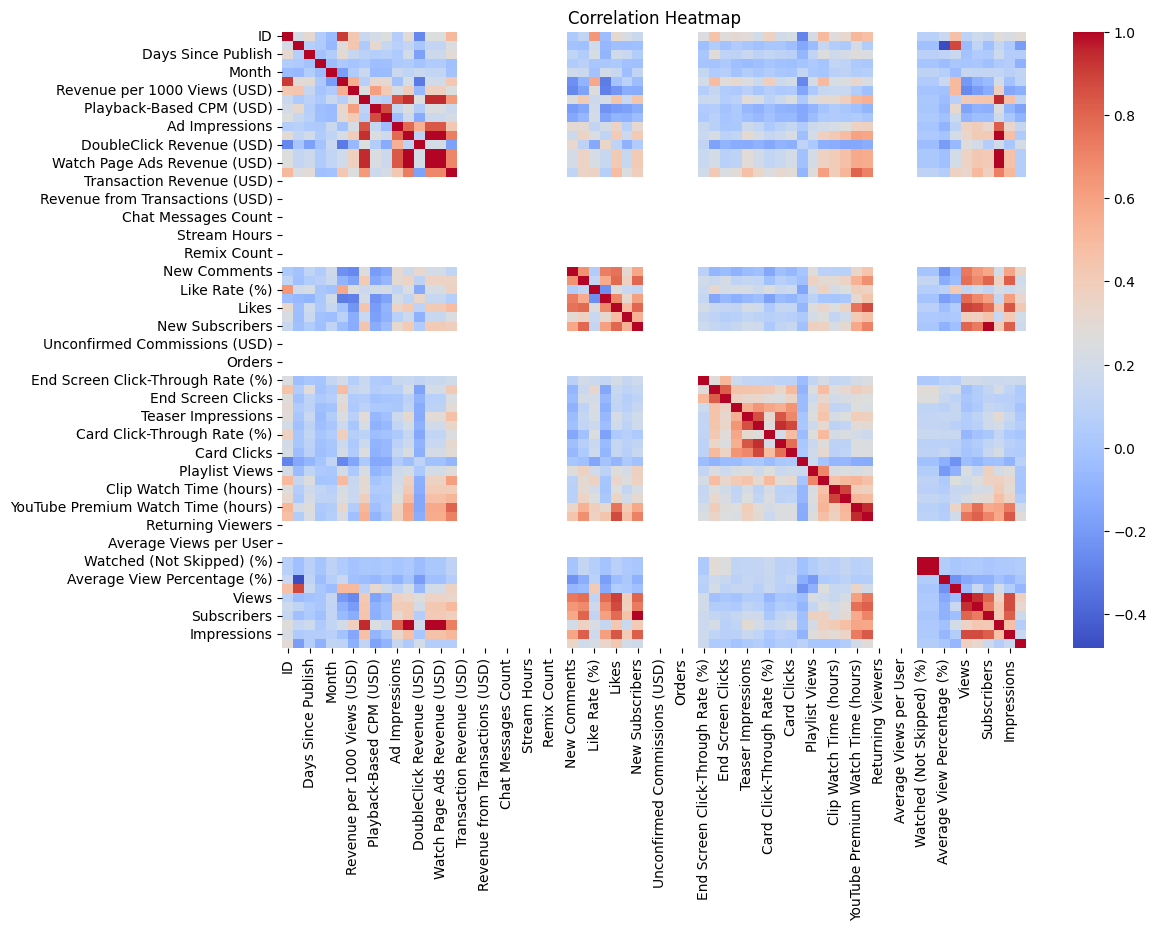

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
if 'Likes' in data.columns and 'Shares' in data.columns and 'Comments' in data.columns:
    data['Engagement Rate'] = (data['Likes'] + data['Shares'] + data['Comments']) / data['Views'] * 100

# Select features and target
features = ['Views', 'Subscribers', 'Likes', 'Shares', 'Comments', 'Engagement Rate']
target = 'Estimated Revenue (USD)'

In [ ]:
features = [f for f in features if f in data.columns]

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 113.90
R-squared: -0.31


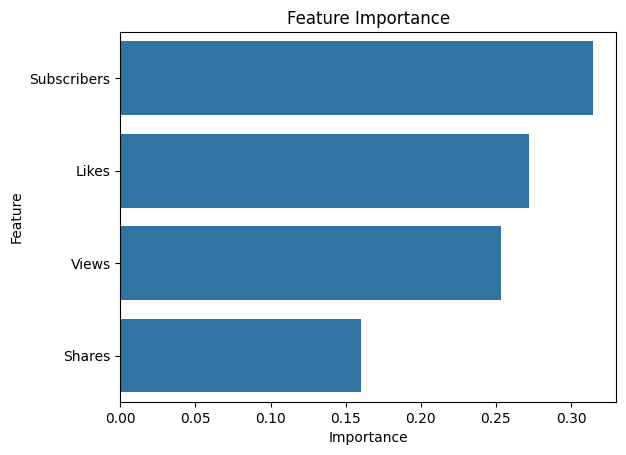

In [ ]:
# ✅ 8. Feature Importance
importances = model.feature_importances_
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Feature Importance")
plt.show()